# Introduction

Herein, I will be analysing some data collected throughout the decades in regards to Olympic medals. In addition, I will be doing some data visualization.

In [91]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30,15))
#autoreload
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [92]:
#Load the data
data_dict = pd.read_csv('./data/raw/dictionary.csv')
data_summer = pd.read_csv('./data/raw/summer.csv')
data_winter = pd.read_csv('./data/raw/winter.csv')

## Aim of the data analysis

1. We will want to acquire a thorough understanding on how the Olympic medal are distribute by country and sport. 
2. We also want to check the countries' evolution throughout the years 
3. Correlation between GDP and GDP per capita with medals 

### 1. Summer Olympics analysis

Let's have a overall look at the data and its features

In [93]:
data_summer.head(10)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
5,1896,Athens,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,1200M Freestyle,Bronze
6,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold
7,1896,Athens,Aquatics,Swimming,"ANDREOU, Joannis",GRE,Men,1200M Freestyle,Silver
8,1896,Athens,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,400M Freestyle,Bronze
9,1896,Athens,Aquatics,Swimming,"NEUMANN, Paul",AUT,Men,400M Freestyle,Gold


We can see the data is ordered by year, gender. Let's look at the end of the data to see the sport are alphabetically ordered.

In [94]:
data_summer.tail(10)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
31155,2012,London,Wrestling,Wrestling Freestyle,"AHMADOV, Emin",AZE,Men,Wg 74 KG,Bronze
31156,2012,London,Wrestling,Wrestling Freestyle,"KAZAKEVIC, Aleksandr",LTU,Men,Wg 74 KG,Bronze
31157,2012,London,Wrestling,Wrestling Freestyle,"KHUGAEV, Alan",RUS,Men,Wg 84 KG,Gold
31158,2012,London,Wrestling,Wrestling Freestyle,"EBRAHIM, Karam Mohamed Gaber",EGY,Men,Wg 84 KG,Silver
31159,2012,London,Wrestling,Wrestling Freestyle,"GAJIYEV, Danyal",KAZ,Men,Wg 84 KG,Bronze
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze
31164,2012,London,Wrestling,Wrestling Freestyle,"LIDBERG, Jimmy",SWE,Men,Wg 96 KG,Bronze


Yes, sport are alphabetically ordered. Therefore, we can get some insights from this previous analysis and knowledge. Let's check if there is any missing data.

In [95]:
data_summer.tail(10)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
31155,2012,London,Wrestling,Wrestling Freestyle,"AHMADOV, Emin",AZE,Men,Wg 74 KG,Bronze
31156,2012,London,Wrestling,Wrestling Freestyle,"KAZAKEVIC, Aleksandr",LTU,Men,Wg 74 KG,Bronze
31157,2012,London,Wrestling,Wrestling Freestyle,"KHUGAEV, Alan",RUS,Men,Wg 84 KG,Gold
31158,2012,London,Wrestling,Wrestling Freestyle,"EBRAHIM, Karam Mohamed Gaber",EGY,Men,Wg 84 KG,Silver
31159,2012,London,Wrestling,Wrestling Freestyle,"GAJIYEV, Danyal",KAZ,Men,Wg 84 KG,Bronze
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze
31164,2012,London,Wrestling,Wrestling Freestyle,"LIDBERG, Jimmy",SWE,Men,Wg 96 KG,Bronze


In [96]:
data_summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


Apparently, there are 4 missing data on the country field. We will assign those country as Independent Olympic Athletes (IOA), as many athltes compete under this flag due to political issues between associations.

Let's first check whether we have country registered

In [97]:
data_summer.loc[data_summer['Country'] == 'IOA']

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal


Seems that there are no data from this country. Given the significant size of data missing compared to the total amount of entries (i.e. 4 vs 31165), we can Insert IOA for those medals.

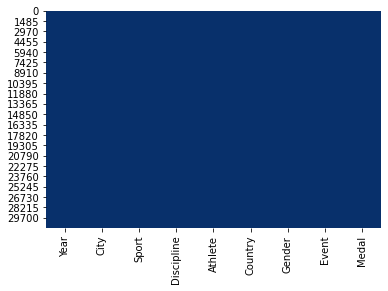

In [98]:
data_summer["Country"].fillna("IOA", inplace=True)
sns.heatmap(data_summer.isnull(), cbar=False, cmap='Blues_r')

Great! Now it seems that we do not have any missing data. We can start analysing the data.

Let's have a look at simple trends and data.

#### 1.1. Evolution of number of sports competed over the year

Here we will see how many sports have been introduced over the year.

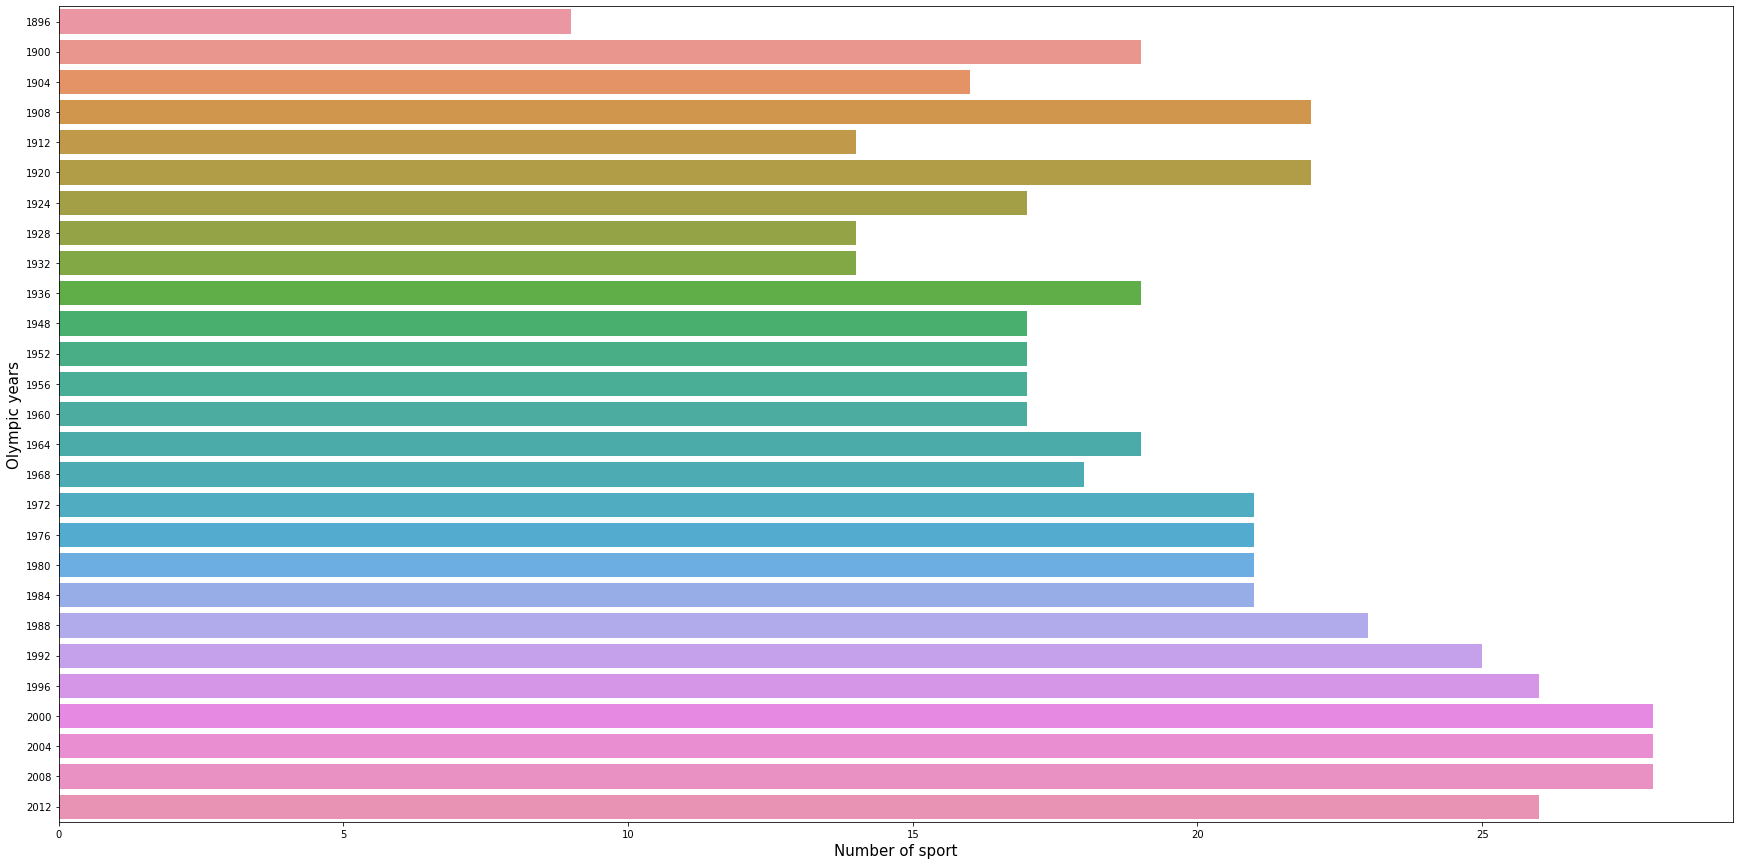

In [107]:
plt.figure(figsize=(30,15))
sns.barplot(x=data_summer.groupby('Year')['Sport'].nunique(),y=data_summer['Year'].unique(), data=data_summer, orient='h')
plt.xlabel('Number of sport', fontsize=15)
plt.ylabel('Olympic years', fontsize=15)
plt.show()

Although there is a variation along the year, it seems that the number of sports included in the Olympic games has increased. 

####  1.2. Gender evolution

Let's see the women participation compared to men.

In [113]:
plt.figure(figsize=(30,15))
sns.barplot(x=data_summer.groupby('Year')['Medal'].count(),y=data_summer['Year'].unique(), data=data_summer, hue=data_summer["Gender"], orient='h')
plt.xlabel('Gender', fontsize=15)
plt.ylabel('Medal number', fontsize=15)
plt.show()

ValueError: Grouper and axis must be same length

<Figure size 2160x1080 with 0 Axes>